In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



# Data Preparation

In [2]:
df=pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.info()
# df.isnull().sum().sum() # 500 null rows that will have to be dealt with
# df.duplicated().sum() #confirm no duplictaes
#contains nulls and some floats are objects


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
#only take types that are trading and drop unnecessary columns
trading = df[df['IsTrading'] == True]
trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# reduce down to types that have actually been mined
mined=trading[trading['TotalCoinsMined']>0]
mined=mined.reset_index(drop=True)

In [6]:
#correct data type of "TotalCoinSupply"
mined["TotalCoinSupply"] = pd.to_numeric(mined.TotalCoinSupply, errors='coerce')

In [7]:
target=mined['CoinName']
mined=mined.drop(columns={"IsTrading", 'CoinName', 'Unnamed: 0'}).dropna().reset_index(drop=True)

In [8]:
mined

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2.000000e+09
528,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
529,CryptoNight,PoW,9.802226e+08,1.400223e+09
530,Equihash,PoW,7.296538e+06,2.100000e+07


In [9]:
target

0          42 Coin
1          404Coin
2        EliteCoin
3          Bitcoin
4         Ethereum
          ...     
527         ZEPHYR
528        Gapcoin
529         Beldex
530        Horizen
531    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [10]:
numeric=pd.get_dummies(mined)
# print(numeric.columns)
numeric

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DF grew from 4 columns to 98, meaning there are a lot of different options in Algorithm(+/- 70) and ProofType(+/- 25).

In [11]:
#scale rows outside of the 0-1 scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric[['TotalCoinsMined', 'TotalCoinSupply']])

In [12]:
new_df = pd.DataFrame(scaled_data)
new_df

,0,1
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870
...,...,...
527,-0.073251,-0.123317
528,-0.116781,-0.149176
529,-0.095613,-0.132179
530,-0.116948,-0.152560


In [13]:
#add these rows to the original df with updated names
numeric['TotalCoinsMinedAdj']=new_df[0] 
numeric['TotalCoinSupplyAdj']=new_df[1]

In [14]:
numeric

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMinedAdj,TotalCoinSupplyAdj
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.117108,-0.152870
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.093970,-0.145009
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.524946,4.489424
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116715,-0.152560
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114747,-0.152870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073251,-0.123317
528,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116781,-0.149176
529,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.095613,-0.132179
530,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116948,-0.152560


In [15]:
#clean up the stuff we dont need
numeric=numeric.drop(columns={'TotalCoinsMined', "TotalCoinSupply"})
numeric

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMinedAdj,TotalCoinSupplyAdj
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.117108,-0.152870
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.093970,-0.145009
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.524946,4.489424
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116715,-0.152560
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114747,-0.152870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.073251,-0.123317
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116781,-0.149176
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.095613,-0.132179
530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116948,-0.152560


# Dimensionality Reduction

### PCA Model

In [16]:
# Initialize PCA model
 
pca = PCA(n_components=.90)
reduced_pca = pca.fit_transform(numeric)

In [17]:
#confirm variace
pca.explained_variance_ratio_.sum()

0.90488890007667

In [18]:
# Transform PCA data to a DataFrame
reduced_df = pd.DataFrame(
    data=reduced_pca
)
reduced_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
1,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
2,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
3,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
4,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333


To gain 90% of the explained variance, we reduced our data set to 12 items via PCA.

###  t-SNE

In [19]:
# Initialize t-SNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=2000, learning_rate=35)
# Reduce dimensions

tsne_features = tsne.fit_transform(reduced_df)


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 532 samples in 0.002s...
[t-SNE] Computed neighbors for 532 samples in 0.010s...


/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 532 / 532
[t-SNE] Mean sigma: 0.001048
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.355095
[t-SNE] KL divergence after 2000 iterations: 0.174204


In [20]:
tsne.n_features_in_
# tsne.n_iter_
# tsne.kl_divergence_
# tsne.embedding_

12

In [21]:
tsne_df= pd.DataFrame(tsne_features)
tsne_df

,0,1
0,-3.948063,29.145201
1,1.970814,23.057938
2,9.502651,4.454619
3,-34.397312,-8.819522
4,20.798412,-14.210846
...,...,...
527,-0.349202,-5.468087
528,0.137590,24.955526
529,13.402271,-1.608649
530,10.318178,-16.421082


In [22]:
# The first column of transformed features
reduced_df['x'] = tsne_df[0]

# The second column of transformed features
reduced_df['y'] = tsne_df[1]


In [23]:
# Check entire DF
reduced_df

,0,1,2,3,4,5,6,7,8,9,10,11,x,y
0,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789,-3.948063,29.145201
1,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888,1.970814,23.057938
2,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220,9.502651,4.454619
3,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461,-34.397312,-8.819522
4,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333,20.798412,-14.210846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.108902,-0.046517,-0.116900,0.467190,0.034621,-0.668186,0.576375,0.831228,-0.120427,0.240369,-0.164298,-0.063213,-0.349202,-5.468087
528,-0.206436,-0.801391,0.175309,-0.672233,-0.027869,-0.027316,0.002264,-0.016786,-0.047284,-0.023163,-0.007821,0.015774,0.137590,24.955526
529,-0.124589,0.736198,-0.090418,0.144735,-0.240199,-0.126672,-0.350559,-0.273663,-0.698662,0.430965,-0.085360,0.070798,13.402271,-1.608649
530,-0.174924,0.695669,-0.155193,0.136888,-0.215873,-0.111529,-0.271995,0.058355,0.169750,-0.213838,0.121578,0.832969,10.318178,-16.421082


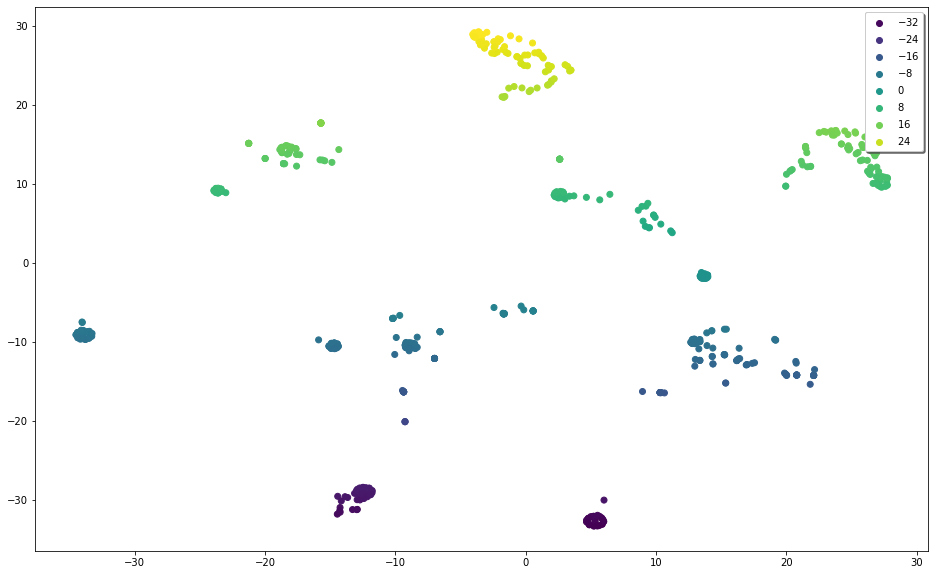

In [24]:
plt.style.use('seaborn-bright')

x = reduced_df['x']
y = reduced_df['y']
c = reduced_df['y']

fig, ax = plt.subplots(figsize=(16,10))

scatter = ax.scatter(x, y, c=c)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc='upper right',
          fancybox=True, shadow=True)
ax.add_artist(legend1)

# Cluster Analysis with k-Means

In [25]:
model = KMeans()
model.fit(reduced_df)

/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KMeans()

/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/michaelraines/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

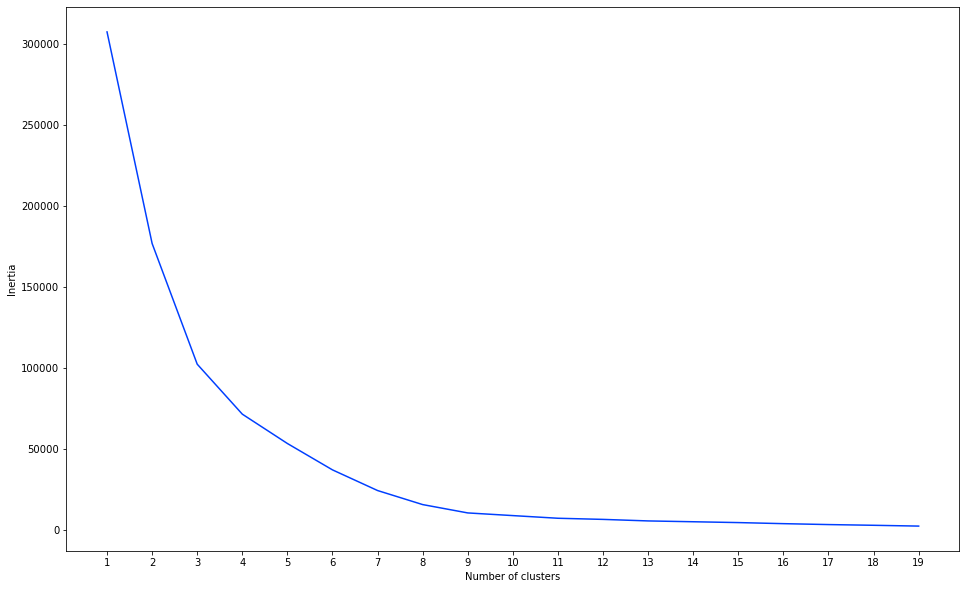

In [26]:
inertia = []
k = list(range(1,20))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(reduced_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow['Change Rate']= df_elbow["inertia"].pct_change().map('{:,.2f}'.format)

plt.figure(figsize=(16,10))
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
df_elbow.head(20)

,k,inertia,Change Rate
0,1,307418.265028,nan
1,2,176842.349846,-0.42
2,3,102373.841339,-0.42
3,4,71537.223859,-0.30
4,5,53423.989949,-0.25
5,6,37145.898365,-0.30
6,7,24399.308327,-0.34
7,8,15729.646744,-0.36
8,9,10583.715578,-0.33
9,10,8934.251243,-0.16


Based on all available information, it looks like the Crypto's will be very difficult to clump effectivly.  (If they do clump, it's into +/- 14 groups at best before the rate of change begins to normalize and the curve hits its "elbow".) I'd recommend to my client to avoid buying in groups, rather target a few individual types.  